# Lecture 2: Pandas Introduction, DataFrame from CSV
Pandas is a popular Python package for data science, and with good reason: it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy, among many other things. The DataFrame is one of these structures.

Pandas DataFrames make manipulating your data easy, from selecting or replacing columns and indices to reshaping your data. You won't have to write functions yourself to read and write data as we did in the first lecture.

The best intro guide, but it's big, is 10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
Check the website on the library here : https://pandas.pydata.org. You can also find documentation in this website.

This is also a good <a href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=229765585183&utm_targetid=dsa-473406573835&utm_loc_interest_ms=&utm_loc_physical_ms=9056017&gclid=Cj0KCQjwh8jrBRDQARIsAH7BsXcYZ9E60iAAQ9t8VhRS_TyfOtaM571VNV8EGKby9wgj9An4b1SZepgaAioSEALw_wcB"> tutorial on Pandas </a>
    

Let's start to work with pandas, to make analysis of this data easier.  Our convention is to import as "pd":

In [1]:
import pandas as pd

# numpy is a library very useful in Python for numerical stuff
import numpy as np

# two librairies for plotting
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

## Reading/Writing files<a name="1. Reading/Writing files"></a>
### Reading<a name="1.1 Reading"></a>

In this notebook we are going to use two different datasets : one with more 'qualitative' information and one with 'quantitative' info. 

In [2]:
# Pandas has built-in tools to read files, including csv and excel.
complaints = pd.read_csv('data/311-service-requests.csv')
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, low_memory=False)

C:\Users\konst\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are NaN which are recognized as float by the funciton. 

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.



In [3]:
complaints
#bikes

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"


Check the type of the data and see for yourself

In [4]:
# type of the results
type(complaints)

pandas.core.frame.DataFrame

** The function returns a DataFrame which is an object with a lot of things defined on it **

### Writing<a name="1.2 Writing"></a>

*We can also save out a csv file from pandas in a simple way*


In [5]:
complaints.to_csv("data/saved_complaints.csv")

*What if we only wanted some of the columns? We can pick which ones to write out*


In [6]:
complaints.to_csv("data/saved_complaints2.csv", columns=["Created Date", "Closed Date"])

*If you don't want the extra index row with the rownumber and no header, you can prevent that from being saved by saying "index=None" and "header = None)*


In [7]:
complaints.to_csv("data/saved_complaints3.csv", columns=["Created Date", "Closed Date"], index=None, header=None)

## Viewing Data<a name="2. Viewing Data"></a>
### See the top & bottom rows of the frame<a name="2.1. See the top & bottom rows of the frame"></a>

This command shows us the result of the operation, with the top 5 rows of the table. You can specify the number of rows you want to show inside the brackets.

In [8]:
complaints.head(3)  
#bikes.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"


To show the bottomm rows: 

In [9]:
complaints.tail(3)
#bikes.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"


### Plotting data
Since complaints contain many qualitative data, lets first experiment with the bikes data to experiment with plotting and visualizing.

In [10]:
bikes.head()

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,2012-01-01,35,NaN,0,38,51,26,10,16,NaN
1,2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2,2012-01-03,135,NaN,2,104,248,89,3,58,NaN
3,2012-01-04,144,NaN,1,116,318,111,8,61,NaN
4,2012-01-05,197,NaN,2,124,330,97,13,95,NaN


To make a plot from pandas, we use the dataframe object we created, then tell the plot function
what to use as the X column and what to use as the Y column.

<AxesSubplot:xlabel='Date'>

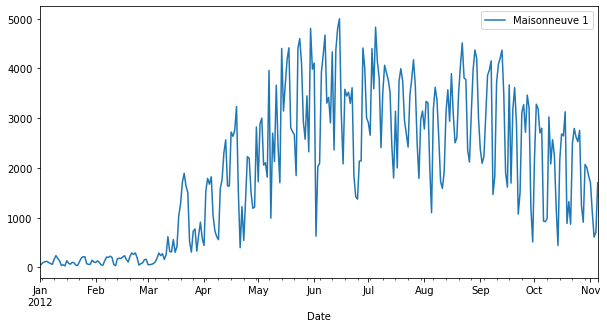

In [11]:
bikes.plot( 'Date',"Maisonneuve 1",figsize=(10,5))

## Selection
Lets now experiment with data selection.

*Let's use complaints data again*


In [12]:
complaints.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"


### Get a slice from a DataFrame
#### Get a specific column

**Selection by colomn name**

In [13]:
complaints["Agency"]

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

In [14]:
complaints.Agency

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

**If you want to select certain rows**

All rows

In [15]:
complaints.loc[:,'Agency']

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

Some rows

In [16]:
complaints.loc[1:3,'Agency']

1    NYPD
2    NYPD
3    NYPD
Name: Agency, dtype: object

**Selection by position**

In [17]:
# comment/uncomment lines
complaints.iloc[:,3]

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

#### Get a line

In [18]:
complaints.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"


In [19]:
# comment/uncomment lines
complaints.iloc[1,:]
#complaints.loc[1,:] #Selection by Label

Unique Key                                                        26593698
Created Date                                        10/31/2013 02:01:04 AM
Closed Date                                                            NaN
Agency                                                                NYPD
Agency Name                                New York City Police Department
Complaint Type                                             Illegal Parking
Descriptor                                    Commercial Overnight Parking
Location Type                                              Street/Sidewalk
Incident Zip                                                         11378
Incident Address                                                 58 AVENUE
Street Name                                                      58 AVENUE
Cross Street 1                                                    58 PLACE
Cross Street 2                                                   59 STREET
Intersection Street 1    

Type of columns or rows

In [20]:
print(type(complaints["Agency"]))
print(type(complaints.iloc[1,:]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


** A Slice of shape (1,) or (,1) is not a DataFrame but a Serie. The associated functions are not exactly the same **

In [21]:
# Possible to build a DataFrame from a serie
pd.DataFrame(complaints["Agency"]).head()

,Agency
0,NYPD
1,NYPD
2,NYPD
3,NYPD
4,DOHMH


#### Select multiple rows and columns

Sometimes you want to combine your selection to rows and columns.  You can do that with `.loc[]` and `.iloc[]`.

`iloc[rows,colums]` is for use with **number selectors** for row and column, and `loc[rows,columns]` is for **label selectors** for row and column (if they exist).

The documentation for this is [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

If you use these, you must put a row selector first, then a column selector:

In [22]:
#Selecting by integer is done with iloc:
# this selects the first 10 rows and the first 3 columns.
complaints.iloc[0:10, 0:3]

,Unique Key,Created Date,Closed Date
0,26589651,10/31/2013 02:08:41 AM,NaN
1,26593698,10/31/2013 02:01:04 AM,NaN
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM
4,26590930,10/31/2013 01:53:44 AM,NaN
5,26592370,10/31/2013 01:46:52 AM,NaN
6,26595682,10/31/2013 01:46:40 AM,NaN
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM


select rows 0:5, but the columns between the named columns here:
Note, this works with row numbers because there is no label for the rows aside from numbers.
Notice this command loc is "inclusive" of the end points on the range.  Meaning it includes them.

In [23]:
complaints.loc[0:5, 'Closed Date':'Complaint Type']

,Closed Date,Agency,Agency Name,Complaint Type
0,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk
1,NaN,NYPD,New York City Police Department,Illegal Parking
2,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial
3,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle
4,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent
5,NaN,NYPD,New York City Police Department,Noise - Commercial


What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want, using double square brackets (Or using the `loc[]` method above):

In [24]:
#complaints[['Complaint Type', 'Borough']]
complaints.loc[:,['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


### Boolean Indexing
Boolean indexing is useful when we need to select data based on a certain criteria. For example, if we only want to select data where the value of the Unique Key colomn is greater than 26595140:

Check which data satisties the condition:

In [25]:
complaints['Unique Key'] > 26595140

0         False
1         False
2         False
3          True
4         False
          ...  
111064    False
111065    False
111066    False
111067    False
111068    False
Name: Unique Key, Length: 111069, dtype: bool

In [26]:
complaints[complaints['Unique Key'] > 26595140].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
10,26595176,10/31/2013 01:25:12 AM,NaN,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11218,3775 18 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634378,-73.969462,"(40.63437840816299, -73.96946177104543)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"


Use Function isin() to select the data rows that contain specific values in a specific column.
For example this command selects all rows that have Complaint Type is equal to the values "Noise - Vehicle" and "Noise - Street/Sidewalk"

In [27]:
complaints[complaints['Complaint Type'].isin(['Noise - Vehicle','Noise - Street/Sidewalk'])]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
13,26594391,10/31/2013 01:20:13 AM,NaN,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10466,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.891517,-73.836457,"(40.89151738488846, -73.83645714593568)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
22,26589678,10/31/2013 12:39:55 AM,NaN,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692394,-73.833891,"(40.69239424979043, -73.8338912453996)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111044,26426096,10/04/2013 12:14:09 AM,10/04/2013 01:03:46 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10032,539 WEST 162 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.836532,-73.941018,"(40.836532082987944, -73.9410182995914)"
111048,26430030,10/04/2013 12:12:07 AM,10/04/2013 02:45:24 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10027,215 WEST 131ST STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.813339,-73.946328,"(40.81333907832113, -73.94632769228208)"
111054,26426060,10/04/2013 12:06:39 AM,10/04/2013 12:31:16 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11224,4823 BEACH 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577515,-74.012207,"(40.57751513866536, -74.01220705163807)"
111059,26429040,10/04/2013 12:04:52 AM,10/04/2013 03:01:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003,99 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.727251,-73.988660,"(40.727251287038676, -73.98866028603422)"


**Using list of Booleans**

Check when values in a specific column is equal to a specific value.

In [28]:
complaints['Complaint Type'] == 'Noise - Street/Sidewalk'

0          True
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

In [29]:
complaints[complaints['Complaint Type'] == 'Noise - Street/Sidewalk' ]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"
28,26594085,10/31/2013 12:32:08 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026,121 WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.802390,-73.950526,"(40.80238950799943, -73.95052644123253)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111044,26426096,10/04/2013 12:14:09 AM,10/04/2013 01:03:46 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10032,539 WEST 162 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.836532,-73.941018,"(40.836532082987944, -73.9410182995914)"
111048,26430030,10/04/2013 12:12:07 AM,10/04/2013 02:45:24 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10027,215 WEST 131ST STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.813339,-73.946328,"(40.81333907832113, -73.94632769228208)"
111054,26426060,10/04/2013 12:06:39 AM,10/04/2013 12:31:16 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11224,4823 BEACH 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577515,-74.012207,"(40.57751513866536, -74.01220705163807)"
111059,26429040,10/04/2013 12:04:52 AM,10/04/2013 03:01:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003,99 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.727251,-73.988660,"(40.727251287038676, -73.98866028603422)"


You can also combine more than one condition with the `&` operator like this:

In [30]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
# now, both must be true since we use & here:
complaints[~(is_noise & in_brooklyn)].iloc[:10,:]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"


Or, to limit the columns we return -- 


In [31]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']]


,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
...,...,...,...,...
111002,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 01:02:45 AM,Loud Music/Party
111006,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 12:59:57 AM,Loud Talking
111021,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 12:42:45 AM,Loud Talking
111035,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 12:21:04 AM,Loud Music/Party


## Get information about data
### Display the index, columns, and the underlying numpy data

In [32]:
complaints.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"


In [33]:
complaints.index

RangeIndex(start=0, stop=111069, step=1)

To get the index of the rows that satisfy a certain condition use .index

In [34]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']].index

Int64Index([    31,     49,    109,    236,    370,    378,    656,   1251,
              5416,   5584,
            ...
            110937, 110939, 110941, 110946, 110960, 111002, 111006, 111021,
            111035, 111054],
           dtype='int64', length=456)

In [35]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [36]:
complaints.values

array([[26589651, '10/31/2013 02:08:41 AM', nan, ..., 40.70827532593202,
        -73.79160395779721, '(40.70827532593202, -73.79160395779721)'],
       [26593698, '10/31/2013 02:01:04 AM', nan, ..., 40.72104053562831,
        -73.90945306791765, '(40.721040535628305, -73.90945306791765)'],
       [26594139, '10/31/2013 02:00:24 AM', '10/31/2013 02:40:32 AM',
        ..., 40.843329754665135, -73.93914371913482,
        '(40.84332975466513, -73.93914371913482)'],
       ...,
       [26428987, '10/04/2013 12:00:45 AM', '10/04/2013 01:25:01 AM',
        ..., 40.7402953546437, -73.97695165980414,
        '(40.740295354643706, -73.97695165980414)'],
       [26426115, '10/04/2013 12:00:28 AM', '10/04/2013 04:17:32 AM',
        ..., 40.640181746624854, -73.95530566958138,
        '(40.64018174662485, -73.95530566958138)'],
       [26428033, '10/04/2013 12:00:10 AM', '10/04/2013 01:20:52 AM',
        ..., 40.64002405739922, -73.90071711703162,
        '(40.640024057399216, -73.90071711703163)']

To get the types of the data columns in the dataframe

In [37]:
complaints.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

### Describe data
The describe function summarizes statistics of the numerical data present in the DataFrame.

 - mean : average
 - std : standard deviation
 - Maximum
 - Minimum
 - Quantile 25 50 75 
 

In [38]:
bikes.describe()
# Only the numeric columns

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


*Now we can see the min and max, and check if we were right!*

In [39]:
# We define a new function get_highest for DataFrame
def get_highest(data, name_column):
    highest = 0
    for value in data.loc[:,name_column]:
        if float(value) > highest:
            highest = float(value)
    return highest

In [40]:
get_highest(bikes, 'Maisonneuve 1')

4999.0

#### Plotting histograms

array([[<AxesSubplot:title={'center':'Berri 1'}>,
        <AxesSubplot:title={'center':'Brébeuf (données non disponibles)'}>,
        <AxesSubplot:title={'center':'Côte-Sainte-Catherine'}>],
       [<AxesSubplot:title={'center':'Maisonneuve 1'}>,
        <AxesSubplot:title={'center':'Maisonneuve 2'}>,
        <AxesSubplot:title={'center':'du Parc'}>],
       [<AxesSubplot:title={'center':'Pierre-Dupuy'}>,
        <AxesSubplot:title={'center':'Rachel1'}>,
        <AxesSubplot:title={'center':'St-Urbain (données non disponibles)'}>]],
      dtype=object)

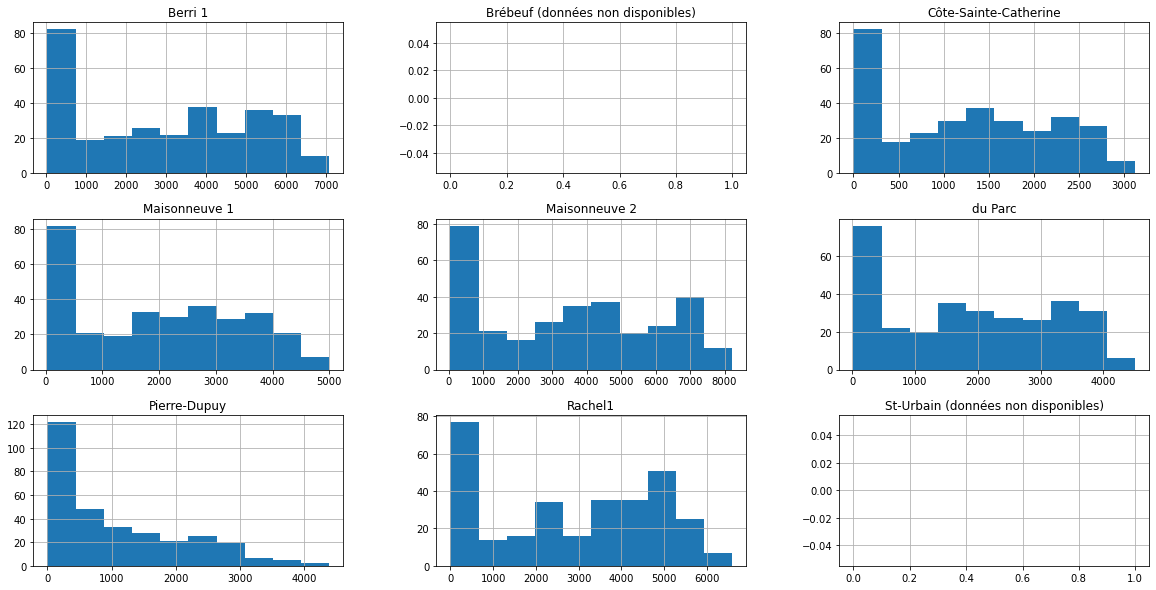

In [41]:
bikes.hist(figsize = (20,10))

<AxesSubplot:>

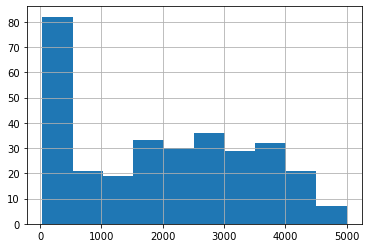

In [42]:
# histogram of a specific column
bikes['Maisonneuve 1'].hist()

### Simple stats on Numerical columns

In [43]:
bikes['Côte-Sainte-Catherine'].sum()

382339

In [44]:
bikes['Côte-Sainte-Catherine'].mean()

1233.3516129032257

In [45]:
bikes['Côte-Sainte-Catherine'].max()

3124

In [46]:
bikes['Côte-Sainte-Catherine'].min()

0

In [47]:
bikes['Côte-Sainte-Catherine'].median()

1269.0

## Reorganizing data
### Transposing data 

In [48]:
bikes.T

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
Date,2012-01-01 00:00:00,2012-01-02 00:00:00,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-07 00:00:00,2012-01-08 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,...,2012-10-27 00:00:00,2012-10-28 00:00:00,2012-10-29 00:00:00,2012-10-30 00:00:00,2012-10-31 00:00:00,2012-11-01 00:00:00,2012-11-02 00:00:00,2012-11-03 00:00:00,2012-11-04 00:00:00,2012-11-05 00:00:00
Berri 1,35,83,135,144,197,146,98,95,244,397,...,1857,1310,2919,2887,2634,2405,1582,844,966,2247
Brébeuf (données non disponibles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Côte-Sainte-Catherine,0,1,2,1,2,0,2,1,2,3,...,792,697,1458,1251,1294,1208,737,380,446,1170
Maisonneuve 1,38,68,104,116,124,98,80,62,165,238,...,1244,910,2071,2007,1835,1701,1109,612,710,1705
Maisonneuve 2,51,153,248,318,330,244,108,98,432,563,...,2461,1776,3768,3516,3453,3082,2277,1137,1277,3221
du Parc,26,53,89,111,97,86,53,64,198,275,...,1193,955,2440,2255,2220,2076,1392,713,692,2143
Pierre-Dupuy,10,6,3,8,13,4,6,11,12,18,...,618,387,411,338,245,165,97,105,197,179
Rachel1,16,43,58,61,95,75,54,63,173,241,...,2471,1876,2795,2790,2570,2461,1888,1302,1374,2430
St-Urbain (données non disponibles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sorting data

In [49]:
bikes.sort_values(by = 'Berri 1', ascending=False).head()
# add arg inplace = True to perform operation in-place

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
166,2012-06-15,7077,NaN,2469,4999,7663,4053,2293,6491,NaN
165,2012-06-14,6908,NaN,2978,4809,7934,4223,2386,6243,NaN
184,2012-07-03,6712,NaN,2634,4398,7416,3896,2606,5462,NaN
186,2012-07-05,6672,NaN,2603,4830,7764,3816,2746,5153,NaN
234,2012-08-22,6529,NaN,2671,4513,7065,3774,2391,5154,NaN


In [50]:
# it's possible to sort a column with the same function
bikes['du Parc'].sort_values().head()

55    18
14    18
13    19
0     26
20    32
Name: du Parc, dtype: int64

## Transforming data
### Transforming existing data
*To avoid transforming df, we first make a copy*


In [51]:
complaints_copy = complaints.copy()
# df_copy = df only creates a alias, not a new object !
bikes_copy = bikes.copy()

*You just have to assign new values to a selection*

Lets assign the values 1 to 3 to the first "Unique Key" rows


In [52]:
complaints_copy.loc[0:2,'Unique Key'] = np.array([1,2,3])
complaints_copy.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,1,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,2,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,3,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


### Adding new data

Lets add the column Daily Total to our data and assign each value as the sum of the others 

In [53]:
# Adding a column
bikes_copy['Daily Total'] = bikes['Berri 1'] + bikes['Côte-Sainte-Catherine'] + bikes['Maisonneuve 1'] + bikes['Maisonneuve 2']+ bikes['du Parc']+ bikes['Pierre-Dupuy']+ bikes['Rachel1']
bikes_copy.head()

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
0,2012-01-01,35,NaN,0,38,51,26,10,16,NaN,176
1,2012-01-02,83,NaN,1,68,153,53,6,43,NaN,407
2,2012-01-03,135,NaN,2,104,248,89,3,58,NaN,639
3,2012-01-04,144,NaN,1,116,318,111,8,61,NaN,759
4,2012-01-05,197,NaN,2,124,330,97,13,95,NaN,858


### Dropping data
- To delete a row or a column use the function drop(). 
- To drop a column set axis = 1 
- To delete the column without having to reassign like this: bikes_copy = bikes_copy.drop()
--> you can set the parameter inplace = True


In [54]:
bikes_copy.drop('Brébeuf (données non disponibles)', axis = 1, inplace = True)
bikes_copy.head()

,Date,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
0,2012-01-01,35,0,38,51,26,10,16,NaN,176
1,2012-01-02,83,1,68,153,53,6,43,NaN,407
2,2012-01-03,135,2,104,248,89,3,58,NaN,639
3,2012-01-04,144,1,116,318,111,8,61,NaN,759
4,2012-01-05,197,2,124,330,97,13,95,NaN,858


Finally, to drop by column number instead of by column label, try this to delete the 2nd and 3rd columns

In [55]:
bikes_copy.drop(bikes_copy.columns[[2, 3]], axis=1,inplace = True)  # df.columns is zero-based pd.Index 
bikes_copy.head()

,Date,Berri 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
0,2012-01-01,35,51,26,10,16,NaN,176
1,2012-01-02,83,153,53,6,43,NaN,407
2,2012-01-03,135,248,89,3,58,NaN,639
3,2012-01-04,144,318,111,8,61,NaN,759
4,2012-01-05,197,330,97,13,95,NaN,858


### Sorting values

To sort the values of the columns with respect to a certain column: sort_values(by = '', ascending= )

In [56]:
bikes_copy = bikes_copy.sort_values(by = 'Daily Total',ascending=False)
bikes_copy.head()

,Date,Berri 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
165,2012-06-14,6908,7934,4223,2386,6243,NaN,35481
166,2012-06-15,7077,7663,4053,2293,6491,NaN,35045
256,2012-09-13,6520,7514,4494,1986,5742,NaN,33701
186,2012-07-05,6672,7764,3816,2746,5153,NaN,33584
255,2012-09-12,6349,7292,4510,1981,5697,NaN,33162


After sorting To reset the values, the indices of the rows will be sorted as well. To deal with this we used the reset_index() function. drop = True means not to keep the old index

In [57]:
bikes_copy.reset_index(inplace=True, drop = True)
bikes_copy.head()


,Date,Berri 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
0,2012-06-14,6908,7934,4223,2386,6243,NaN,35481
1,2012-06-15,7077,7663,4053,2293,6491,NaN,35045
2,2012-09-13,6520,7514,4494,1986,5742,NaN,33701
3,2012-07-05,6672,7764,3816,2746,5153,NaN,33584
4,2012-09-12,6349,7292,4510,1981,5697,NaN,33162


### Applying a Function to Each Column

Sometimes it is necessary to apply the same function to certain columns of the data. To do this we use apply().
Lets for example try to apply a function that divides each value starting from the 3rd column by the values of the column Daily Total and put it in a DataFrame named proportions. Notice that we did not put inplace=True and so 
we had to define a new DataFrame called proportions and put the values in it. 

In [58]:
proportions = bikes_copy.iloc[:,2:].apply(lambda x: x/x['Daily Total'], axis=1)
proportions.head()

,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
0,0.223613,0.119021,0.067247,0.175953,NaN,1.0
1,0.218662,0.115651,0.065430,0.185219,NaN,1.0
2,0.222961,0.133349,0.058930,0.170381,NaN,1.0
3,0.231182,0.113626,0.081765,0.153436,NaN,1.0
4,0.219890,0.135999,0.059737,0.171793,NaN,1.0


### Dealing with NA

Missing values is a common problem in data analysis. Missing values are usually automatically replaced by NaN values. To clean our data we can either delete the rows containing NaN or replacing NaNs by specific values.  

Lets check if we have NaN values in the bikes data. For that we use isnull() function. The result is True is the value is Nan and False if it is not.

In [59]:
# To get the boolean mask where values are NaN 
bikes_copy.isnull().head()

,Date,Berri 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False


use fillna() function to replace the NaN values by whatever value you choose.
value can be a string, a number or even a function

In [60]:
# Filling missing data
bikes_copy.fillna(value = 0, inplace=False).head()

,Date,Berri 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
0,2012-06-14,6908,7934,4223,2386,6243,0.0,35481
1,2012-06-15,7077,7663,4053,2293,6491,0.0,35045
2,2012-09-13,6520,7514,4494,1986,5742,0.0,33701
3,2012-07-05,6672,7764,3816,2746,5153,0.0,33584
4,2012-09-12,6349,7292,4510,1981,5697,0.0,33162


In [61]:
bikes_copy.head()

,Date,Berri 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Daily Total
0,2012-06-14,6908,7934,4223,2386,6243,NaN,35481
1,2012-06-15,7077,7663,4053,2293,6491,NaN,35045
2,2012-09-13,6520,7514,4494,1986,5742,NaN,33701
3,2012-07-05,6672,7764,3816,2746,5153,NaN,33584
4,2012-09-12,6349,7292,4510,1981,5697,NaN,33162


Lets replace the NaN values in the Closed Date column in complaints by the string "Unknown"

In [62]:
complaints.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"


In [63]:
complaints_copy['Closed Date'].fillna(value='Unknown', inplace= True)
complaints_copy.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,1,10/31/2013 02:08:41 AM,Unknown,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,2,10/31/2013 02:01:04 AM,Unknown,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,3,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"


To delete all the rows containg NaN, use the dropna() function
- axis where missing values are dropped, 0 <=> row and 1 <=> column
- how : if 'any' NaN are present, drop that label 
- if 'all' labels are NA, drop that label

In [64]:
complaints.dropna(axis = 0, how = 'all', inplace = False).head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


## Counting Values And Filtering<a name="_counting values and filtering"></a>

To count the occurence of specific values for specific columns. We use the `.value_counts()` function.
What's the most common complaint type? This is a really easy question to answer! 

In [65]:
complaints['Complaint Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
DHS Income Savings Requirement        1
Open Flame Permit                     1
DWD                                   1
Municipal Parking Facility            1
X-Ray Machine/Equipment               1
Name: Complaint Type, Length: 165, dtype: int64

If we just wanted the top 10 most common complaints, we can do this:

In [66]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

Transform the result to a dictionary.

In [67]:
dict(complaint_counts)

{'HEATING': 14200,
 'GENERAL CONSTRUCTION': 7471,
 'Street Light Condition': 7117,
 'DOF Literature Request': 5797,
 'PLUMBING': 5373,
 'PAINT - PLASTER': 5149,
 'Blocked Driveway': 4590,
 'NONCONST': 3998,
 'Street Condition': 3473,
 'Illegal Parking': 3343,
 'Noise': 3321,
 'Traffic Signal Condition': 3145,
 'Dirty Conditions': 2653,
 'Water System': 2636,
 'Noise - Commercial': 2578,
 'ELECTRIC': 2350,
 'Broken Muni Meter': 2070,
 'Noise - Street/Sidewalk': 1928,
 'Sanitation Condition': 1824,
 'Rodent': 1632,
 'Sewer': 1627,
 'Consumer Complaint': 1227,
 'Taxi Complaint': 1227,
 'Damaged Tree': 1180,
 'Overgrown Tree/Branches': 1083,
 'Graffiti': 973,
 'Missed Collection (All Materials)': 973,
 'Building/Use': 942,
 'Root/Sewer/Sidewalk Condition': 836,
 'Derelict Vehicle': 803,
 'Derelict Vehicles': 801,
 'Noise - Vehicle': 750,
 'General Construction/Plumbing': 738,
 'Street Sign - Damaged': 691,
 'Dead Tree': 630,
 'SCRIE': 530,
 'Food Establishment': 485,
 'Air Quality': 459,
 

But it gets better! We can plot them!

<AxesSubplot:>

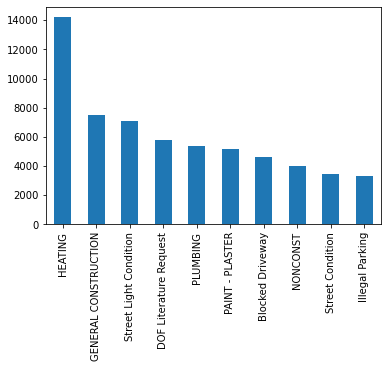

In [68]:
complaint_counts[:10].plot(kind='bar')

We can also see how many unique types of complaints there are in the column, using `.unique` and len (for length):

In [69]:
complaints['Agency'].unique()

array(['NYPD', 'DOHMH', 'DOT', 'TLC', 'HRA', 'DSNY', 'HPD', 'DCA', 'DEP',
       'EDC', 'DHS', 'DPR', 'DOF', 'CHALL', 'DOE', 'DOB', 'FDNY', 'DOITT',
       '3-1-1', 'DFTA', 'COIB', 'OEM', 'OATH', 'OPS', 'OMB', 'DOP'],
      dtype=object)

In [70]:
# get the number of unique values for a feature
len(complaints['Agency'].unique())

26

## Application : Which Borough has the Most Noise Complaints?<a name="_ 8. application : which borough has the most noise complaints?"></a>

To get the noise complaints, we first need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". We use boolean indexing (3.2.)

In [71]:
noise_complaints = complaints[  complaints['Complaint Type'] == "Noise - Street/Sidewalk"  ] 
noise_complaints[0:10]
noise_complaints['Borough']

0                QUEENS
16        STATEN ISLAND
25        STATEN ISLAND
28            MANHATTAN
31             BROOKLYN
              ...      
111044        MANHATTAN
111048        MANHATTAN
111054         BROOKLYN
111059        MANHATTAN
111066        MANHATTAN
Name: Borough, Length: 1928, dtype: object

<AxesSubplot:>

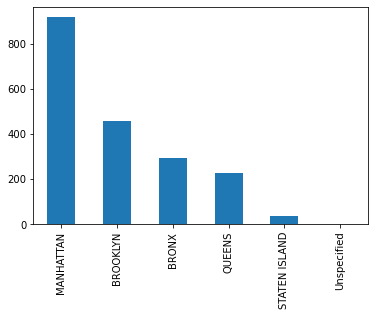

In [72]:
noise_complaints['Borough'].value_counts().plot(kind = 'bar')

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [73]:
complaints['Borough'].value_counts()

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

In [74]:
results = noise_complaints['Borough'].value_counts() / complaints['Borough'].value_counts()
results

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

What if we want to graph this?
The default is a line graph, which is not the right type for this kind of data.  This data is not timeseries (where the X axis is dates/times).  This data is count data by categories that are not ordered -- "boroughs."  The proper type of chart for this is a bar graph.

<AxesSubplot:>

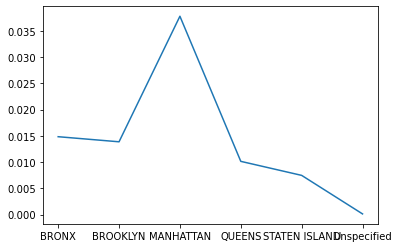

In [75]:
results.plot()

<AxesSubplot:>

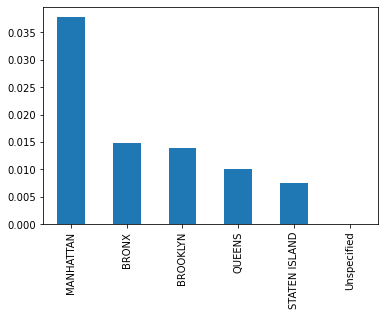

In [76]:
# we can use the keyword argument kind for this:
results.sort_values(ascending=False).plot(kind = 'bar')

# In-Class Exercises
## Part 1: Filtering and Counting Things


In [77]:
df = pd.read_csv('data/chicago_crimes.csv', parse_dates=['Date-Time'], dayfirst=False,)

In [78]:
df.describe()

,identification,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.000000e+03,2000.000000,1780.000000,2000.000000,2000.000000,1.780000e+03,1.780000e+03,2000.0,1780.000000,1780.000000
mean,6.267862e+06,1231.581500,11.565730,23.295500,37.269500,1.164729e+06,1.886418e+06,2008.0,41.843926,-87.671010
std,6.699590e+05,713.767292,7.007958,13.768259,21.817398,1.616071e+04,3.174306e+04,0.0,0.087297,0.058810
min,4.379000e+03,111.000000,1.000000,1.000000,1.000000,1.100635e+06,1.814278e+06,2008.0,41.645636,-87.905312
25%,5.994172e+06,631.000000,6.000000,11.000000,22.000000,1.153470e+06,1.859010e+06,2008.0,41.768470,-87.711982
50%,6.000126e+06,1115.000000,10.000000,24.000000,32.000000,1.165820e+06,1.891388e+06,2008.0,41.857613,-87.666840
75%,6.142792e+06,1821.250000,17.000000,34.000000,57.000000,1.176344e+06,1.910260e+06,2008.0,41.909694,-87.628180
max,9.249024e+06,2535.000000,31.000000,50.000000,77.000000,1.204829e+06,1.951407e+06,2008.0,42.022291,-87.525651


The problem above is that some of those columns have numbers, but not measures you can do math on. The Beat, District, Ward, Community Area, and id are codes, so you can't take their mean, avg, max etc...  We should change them to string types, of "object" in pandas type notation.

In [79]:
df = df.astype({"Ward":"object","Beat":"object", "District":"object", "identification":"object", "Community Area": "object"}, copy=True)

In [80]:
df.describe()

,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.780000e+03,1.780000e+03,2000.0,1780.000000,1780.000000
mean,1.164729e+06,1.886418e+06,2008.0,41.843926,-87.671010
std,1.616071e+04,3.174306e+04,0.0,0.087297,0.058810
min,1.100635e+06,1.814278e+06,2008.0,41.645636,-87.905312
25%,1.153470e+06,1.859010e+06,2008.0,41.768470,-87.711982
50%,1.165820e+06,1.891388e+06,2008.0,41.857613,-87.666840
75%,1.176344e+06,1.910260e+06,2008.0,41.909694,-87.628180
max,1.204829e+06,1.951407e+06,2008.0,42.022291,-87.525651


In [81]:
df.head()

,identification,Case Number,Date-Time,Date,Time,Block,Street,IUCR,Primary Type,Description,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location,Latitude,Longitude
0,7446859,HS247325,2008-01-01 00:01:00,1/1/08,0:01,004XX E 133RD ST,E 133RD ST,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,...,9,54,6,NaN,NaN,2008,4/30/10 1:15,NaN,NaN,NaN
1,6236266,HP323693,2008-01-01 00:01:00,1/1/08,0:01,013XX E 49TH ST,E 49TH ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,...,4,39,6,1186146.0,1872823.0,2008,5/24/08 1:05,"(41.80615476732223, -87.59280284925518)",41.806155,-87.592803
2,7514546,HS317259,2008-01-01 00:01:00,1/1/08,0:01,014XX E 59TH ST,E 59TH ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,...,5,41,6,NaN,NaN,2008,5/24/10 1:12,NaN,NaN,NaN
3,6422569,HP499242,2008-01-01 00:01:00,1/1/08,0:01,014XX E 62ND ST,E 62ND ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,...,20,42,6,1186762.0,1864130.0,2008,8/17/08 1:04,"(41.78228592790556, -87.5908189949899)",41.782286,-87.590819
4,6013347,HP118097,2008-01-01 00:01:00,1/1/08,0:01,014XX E 72ND PL,E 72ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,...,5,43,26,1187119.0,1857171.0,2008,1/16/08 1:05,"(41.76318136897587, -87.58973074990949)",41.763181,-87.589731


### What are the columns in this data set?


In [82]:
# YOUR CODE HERE

df.columns.values

array(['identification', 'Case Number', 'Date-Time', 'Date', 'Time',
       'Block', 'Street', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Location', 'Latitude',
       'Longitude'], dtype=object)

### What are all the Primary Types?  
Hint: use unique()


In [83]:
df["Primary Type"].unique()

array(['THEFT', 'OTHER OFFENSE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE',
       'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'DECEPTIVE PRACTICE',
       'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT', 'BATTERY', 'ASSAULT',
       'BURGLARY', 'INTERFERE WITH PUBLIC OFFICER', 'WEAPONS VIOLATION',
       'NARCOTICS', 'PUBLIC PEACE VIOLATION', 'ROBBERY',
       'LIQUOR LAW VIOLATION', 'OBSCENITY', 'KIDNAPPING', 'PROSTITUTION',
       'HOMICIDE', 'STALKING', 'ARSON'], dtype=object)

### Find out how many of each type occur.

In [84]:
type_count = df["Primary Type"].value_counts()
type_count

THEFT                            605
BATTERY                          358
CRIMINAL DAMAGE                  187
OTHER OFFENSE                    160
NARCOTICS                        126
DECEPTIVE PRACTICE                95
ASSAULT                           87
BURGLARY                          68
MOTOR VEHICLE THEFT               59
OFFENSE INVOLVING CHILDREN        49
CRIMINAL TRESPASS                 42
ROBBERY                           38
CRIM SEXUAL ASSAULT               34
WEAPONS VIOLATION                 33
SEX OFFENSE                       29
PUBLIC PEACE VIOLATION             7
PROSTITUTION                       6
LIQUOR LAW VIOLATION               5
ARSON                              3
HOMICIDE                           3
STALKING                           2
INTERFERE WITH PUBLIC OFFICER      2
OBSCENITY                          1
KIDNAPPING                         1
Name: Primary Type, dtype: int64

### Make a bar chart of the top 10

<AxesSubplot:>

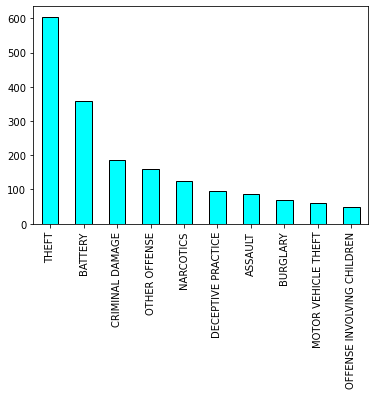

In [85]:
# YOUR CODE HERE
df_counts = df["Primary Type"].value_counts()
df_counts[:10]
df_counts[:10].plot(kind='bar', color='cyan', edgecolor = 'black')

### Make a new dataframe of just the theft types.


In [86]:
# YOUR CODE HERE

df2 = pd.DataFrame(zip(df['Primary Type'].apply(lambda x: 'THEFT' in x), df['Description']))
df2.columns = ['THEFT','Description']
df2

,THEFT,Description
0,True,FINANCIAL ID THEFT:$300 &UNDER
1,True,FINANCIAL ID THEFT: OVER $300
2,True,FINANCIAL ID THEFT: OVER $300
3,True,FINANCIAL ID THEFT: OVER $300
4,False,HARASSMENT BY TELEPHONE
...,...,...
1995,False,TO PROPERTY
1996,False,STRONGARM - NO WEAPON
1997,False,DOMESTIC BATTERY SIMPLE
1998,False,POSS: HEROIN(WHITE)


In [87]:
for i in range(len(df2)):
    if df2["THEFT"].loc[i] == False:
        df2 = df2.drop([i])
    else:
        pass

In [88]:
len(df2)

664

In [89]:
df2

,THEFT,Description
0,True,FINANCIAL ID THEFT:$300 &UNDER
1,True,FINANCIAL ID THEFT: OVER $300
2,True,FINANCIAL ID THEFT: OVER $300
3,True,FINANCIAL ID THEFT: OVER $300
5,True,FINANCIAL ID THEFT:$300 &UNDER
...,...,...
1975,True,OVER $300
1976,True,FROM BUILDING
1983,True,AUTOMOBILE
1988,True,OVER $300


In [90]:
df2.drop(["THEFT"], axis = 1)

,Description
0,FINANCIAL ID THEFT:$300 &UNDER
1,FINANCIAL ID THEFT: OVER $300
2,FINANCIAL ID THEFT: OVER $300
3,FINANCIAL ID THEFT: OVER $300
5,FINANCIAL ID THEFT:$300 &UNDER
...,...
1975,OVER $300
1976,FROM BUILDING
1983,AUTOMOBILE
1988,OVER $300


### Get the counts of each Description type inside the Thefts dataframe.


In [91]:
# YOUR CODE HERE

type_count = df2['Description'].value_counts()
type_count

FINANCIAL ID THEFT: OVER $300       247
FROM BUILDING                        87
$300 AND UNDER                       82
FINANCIAL ID THEFT:$300 &UNDER       68
OVER $300                            60
AUTOMOBILE                           48
RETAIL THEFT                         24
AGG: FINANCIAL ID THEFT              13
ATTEMPT FINANCIAL IDENTITY THEFT     10
THEFT/RECOVERY: AUTOMOBILE            8
PURSE-SNATCHING                       7
POCKET-PICKING                        5
TRUCK, BUS, MOTOR HOME                2
FROM COIN-OP MACHINE/DEVICE           1
ATT: AUTOMOBILE                       1
OVER $500                             1
Name: Description, dtype: int64

### Using your answer above, make a bar chart of the Description type counts.


<AxesSubplot:>

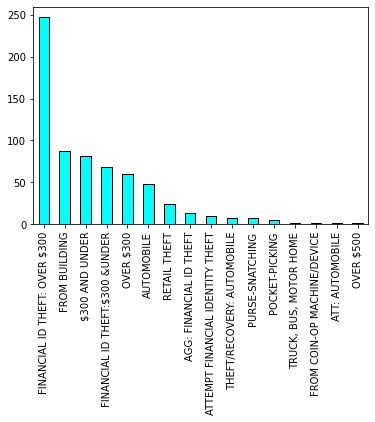

In [92]:
# YOUR CODE HERE
df_typecounts = df2["Description"].value_counts()
df_typecounts.plot(kind='bar', color='cyan', edgecolor = 'black')

### What percentage of all crimes in this data occur in Ward 42? 
Hint: just find out how many occur in ward 42 and then divide by all crimes.


In [93]:
# YOUR CODE HERE
ward_counts = df['Ward'].value_counts()

ward_counts

42    97
28    83
24    72
6     70
15    70
17    69
27    66
7     65
37    62
20    61
2     60
8     55
34    55
16    53
3     51
9     49
29    47
5     47
32    46
21    45
31    41
1     37
30    36
18    36
26    35
10    34
25    32
49    32
40    31
12    30
35    30
43    29
33    28
4     28
38    26
48    25
23    25
14    25
41    23
50    23
44    21
13    19
19    19
11    18
46    18
22    17
39    16
45    16
36    14
47    13
Name: Ward, dtype: int64

In [94]:
ward_counts[42]/ward_counts.sum()

0.0485

### What is the most common crime Primary Type that results in an arrest?


In [95]:
df["Arrest"].value_counts()

False    1583
True      417
Name: Arrest, dtype: int64

In [96]:
arrest_types = []

In [97]:
for i in range(len(df)):
    if df["Arrest"].loc[i] == True:
        arrest_types.append(df["Primary Type"].loc[i])
    else:
        pass

In [98]:
len(arrest_types)

417

In [99]:
df_arrest = pd.DataFrame(arrest_types)
df_arrest

,0
0,CRIM SEXUAL ASSAULT
1,THEFT
2,OFFENSE INVOLVING CHILDREN
3,OFFENSE INVOLVING CHILDREN
4,CRIM SEXUAL ASSAULT
...,...
412,BATTERY
413,NARCOTICS
414,NARCOTICS
415,NARCOTICS


In [100]:
df_arrest[0].value_counts()

NARCOTICS                        123
BATTERY                           93
CRIMINAL TRESPASS                 31
WEAPONS VIOLATION                 30
THEFT                             28
ASSAULT                           28
CRIMINAL DAMAGE                   12
OTHER OFFENSE                     12
CRIM SEXUAL ASSAULT                9
DECEPTIVE PRACTICE                 8
OFFENSE INVOLVING CHILDREN         7
PROSTITUTION                       6
PUBLIC PEACE VIOLATION             6
LIQUOR LAW VIOLATION               5
MOTOR VEHICLE THEFT                5
SEX OFFENSE                        4
HOMICIDE                           3
ROBBERY                            2
INTERFERE WITH PUBLIC OFFICER      2
BURGLARY                           2
OBSCENITY                          1
Name: 0, dtype: int64

## Part 2: Statistics Computation
### Load in the paris rainfall data

In [101]:
# YOUR CODE HERE
rain = pd.read_csv('data/paris_rain.csv', index_col=0)

In [102]:
rain.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,303.000000,303.000000,303.000000,303.000000,303.000000,0.0,0.0,0.0,0.0
mean,43.052980,36.440397,38.354305,43.758278,53.817881,52.834437,55.920530,50.973597,48.191419,51.643564,49.062706,46.993399,NaN,NaN,NaN,NaN
std,24.141688,23.876094,23.397695,25.041584,26.637033,29.193007,32.648032,30.416958,27.262089,30.585322,26.489396,26.778091,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,25.000000,19.000000,21.000000,24.000000,34.000000,32.000000,34.000000,29.000000,28.000000,29.000000,29.000000,27.000000,NaN,NaN,NaN,NaN
50%,40.000000,32.000000,35.000000,41.000000,50.000000,49.000000,49.000000,47.000000,45.000000,46.000000,46.000000,44.000000,NaN,NaN,NaN,NaN
75%,58.750000,48.000000,52.000000,62.000000,70.750000,70.000000,73.750000,65.000000,66.000000,67.000000,64.000000,65.000000,NaN,NaN,NaN,NaN
max,118.000000,135.000000,128.000000,137.000000,135.000000,195.000000,204.000000,201.000000,149.000000,167.000000,139.000000,146.000000,NaN,NaN,NaN,NaN


In [103]:
rain.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
Year,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Use .loc to get all the rain values for the year 1700


In [104]:
# YOUR CODE HERE

rain.loc[1700.0, :]

Jan             27.0
Feb             30.0
Mar             30.0
Apr             63.0
May             39.0
Jun            100.0
Jul             81.0
Aug             20.0
Sep              3.0
Oct             54.0
Nov             58.0
Dec             38.0
Unnamed: 13      NaN
Unnamed: 14      NaN
Unnamed: 15      NaN
Unnamed: 16      NaN
Name: 1700.0, dtype: float64

### Sort by rain amount in January, ascending=False. Now get the top row. What's the year?


In [105]:
# YOUR CODE HERE

rain.sort_values(by = 'Jan', ascending=False).head(1)
#Sorted by descending order the rain amount in January, the highest rainfall was in 1988. 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
Year,,,,,,,,,,,,,,,,
1988.0,118.0,61.0,76.0,26.0,67.0,22.0,126.0,27.0,46.0,68.0,37.0,60.0,NaN,NaN,NaN,NaN


### Find the values for the month of June. Plot in a bar chart. (It's ok if you can't read the x axis labels.)


In [106]:
# YOUR CODE HERE

rain.loc[:,'Jun']



Year
1688.0    75.0
1689.0    20.0
1690.0    63.0
1691.0     NaN
1692.0     NaN
          ... 
NaN        NaN
NaN        NaN
NaN        NaN
NaN        NaN
NaN        NaN
Name: Jun, Length: 3864, dtype: float64

<AxesSubplot:>

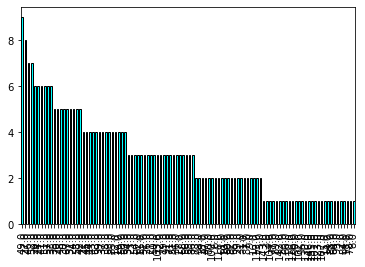

In [107]:
rain_counts = rain.loc[:,'Jun'].value_counts()
rain_counts.plot(kind='bar', color='cyan', edgecolor = 'black')

### What are the max and min values for Jun?  What is the median?


In [108]:
# YOUR CODE HERE
rain['Jun'].max()

195.0

In [109]:
rain['Jun'].min()

1.0

In [110]:
rain['Jun'].median()

49.0

In [111]:
rain['Jun'].describe()

#To prove I used the describe function: The min: 1, the max: 195 and the median (50%):49

count    302.000000
mean      52.834437
std       29.193007
min        1.000000
25%       32.000000
50%       49.000000
75%       70.000000
max      195.000000
Name: Jun, dtype: float64

### Make a histogram for one month's rain.


<AxesSubplot:>

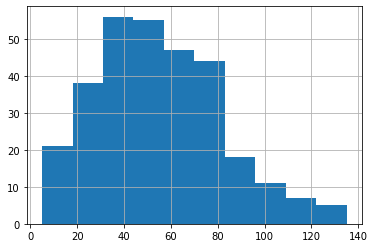

In [112]:
# YOUR CODE HERE
rain['May'].hist()

### Create a column for the total rain each year.  
It's okay if you have a NaN for years with columns with missing data, too.


In [113]:
# YOUR CODE HERE

rain_copy = rain.copy()
rain_copy['Total year'] = rain['Jan'] + rain['Feb'] + rain['Mar'] + rain['Apr'] + rain['May'] + rain['Jun'] + rain['Jul'] + rain['Aug'] + rain['Sep'] + rain['Oct'] + rain['Nov'] + rain['Dec']
rain_copy.head() 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Total year
Year,,,,,,,,,,,,,,,,,
1688.0,NaN,NaN,NaN,NaN,NaN,75.0,47.0,9.0,43.0,46.0,44.0,49.0,NaN,NaN,NaN,NaN,NaN
1689.0,36.0,22.0,22.0,37.0,18.0,20.0,116.0,41.0,45.0,50.0,66.0,18.0,NaN,NaN,NaN,NaN,491.0
1690.0,70.0,32.0,43.0,24.0,68.0,63.0,73.0,79.0,21.0,64.0,23.0,9.0,NaN,NaN,NaN,NaN,569.0
1691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot the proportion or percentage of rain for each January out of the total (hint: jan/total), using a line chart.


In [114]:
# YOUR CODE HERE
proportions = rain_copy.apply(lambda x: x/x['Total year'], axis=1)
proportions.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Total year
Year,,,,,,,,,,,,,,,,,
1688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1689.0,0.073320,0.044807,0.044807,0.075356,0.036660,0.040733,0.236253,0.083503,0.091650,0.101833,0.134420,0.036660,NaN,NaN,NaN,NaN,1.0
1690.0,0.123023,0.056239,0.075571,0.042179,0.119508,0.110721,0.128295,0.138840,0.036907,0.112478,0.040422,0.015817,NaN,NaN,NaN,NaN,1.0
1691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


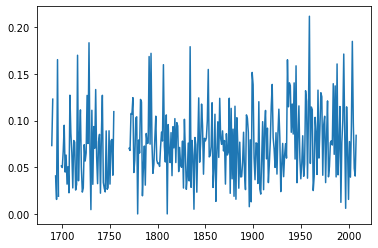

In [115]:
plt.plot(proportions["Jan"])